# Apple Banana Tomato Classification Mobilenet_v2

## Get images

In [1]:
!git clone https://github.com/lacakp/fruit-ds.git

Cloning into 'fruit-ds'...
remote: Enumerating objects: 17142, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 17142 (delta 0), reused 0 (delta 0), pack-reused 17133
Receiving objects: 100% (17142/17142), 376.47 MiB | 33.57 MiB/s, done.
Resolving deltas: 100% (49/49), done.


## Check images

In [2]:
print("All train image in 3 class apple, banana, tomato")
!ls /content/fruit-ds/train/*/* | wc -l 

print("\n------------------")

print("Apple image count")
!ls /content/fruit-ds/train/apple/* | wc -l 

print("\n------------------")

print("Banana Image Count")
!ls /content/fruit-ds/train/banana/* | wc -l 

print("\n------------------")

print("Tomato Image Count")
!ls /content/fruit-ds/train/tomato/* | wc -l 

All train image in 3 class apple, banana, tomato
8003

------------------
Apple image count
3354

------------------
Banana Image Count
1430

------------------
Tomato Image Count
3219


## import MobileNetV2

In [3]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [4]:
model = MobileNetV2(weights='imagenet')

14548992/14536120 [==============================] - 0s 0us/step


## Preparing train and validation data

### Import libraly

In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### Setting path and shape image

In [7]:
train_data_path = '/content/fruit-ds/train'
height = 224
width = 224
batch_size = 32

### Training data

split image from path 70% to training data

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split = 0.3,
    subset = 'training',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 8003 files belonging to 3 classes.
Using 5603 files for training.


### Validation data

In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split = 0.3,
    subset = 'validation',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 8003 files belonging to 3 classes.
Using 2400 files for validation.


### Get Class

In [10]:
classes = train_ds.class_names
print(classes)
print(train_ds)

['apple', 'banana', 'tomato']
<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


## Modifying the model

In [11]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### import libraly

In [12]:
from keras import Model
from keras.layers import Dense

### Custom model

In [13]:
abt_output = Dense(3, activation='softmax')
abt_output = abt_output(model.layers[-2].output)

abt_input = model.input
abt_model = Model(inputs=abt_input, outputs=abt_output)

for layer in abt_model.layers[:-1]:
  layer.trainable = False

### Compile model

In [14]:
abt_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Training the model

In [16]:
ABTFruit = abt_model.fit(train_ds,
                     validation_data = val_ds, 
                     epochs=10
                     )

Epoch 1/10
176/176 [==============================] - 56s 135ms/step - loss: 0.2262 - accuracy: 0.9409 - val_loss: 0.0801 - val_accuracy: 0.9946
Epoch 2/10
176/176 [==============================] - 23s 129ms/step - loss: 0.0589 - accuracy: 0.9934 - val_loss: 0.0398 - val_accuracy: 0.9983
Epoch 3/10
176/176 [==============================] - 23s 129ms/step - loss: 0.0340 - accuracy: 0.9973 - val_loss: 0.0254 - val_accuracy: 0.9992
Epoch 4/10
176/176 [==============================] - 23s 128ms/step - loss: 0.0232 - accuracy: 0.9986 - val_loss: 0.0183 - val_accuracy: 0.9996
Epoch 5/10
176/176 [==============================] - 23s 130ms/step - loss: 0.0169 - accuracy: 0.9993 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 6/10
176/176 [==============================] - 23s 129ms/step - loss: 0.0131 - accuracy: 0.9996 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 7/10
176/176 [==============================] - 23s 129ms/step - loss: 0.0104 - accuracy: 0.9998 - val_loss: 0.0090 - val_ac

## Graph

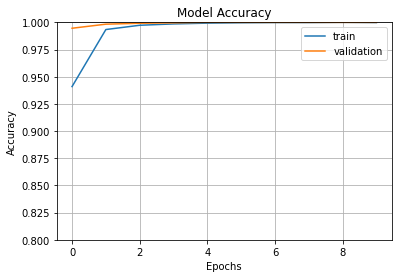

In [19]:
# Model Accuracy
plt.plot(ABTFruit.history['accuracy'])
plt.plot(ABTFruit.history['val_accuracy'])
plt.axis(ymin=0.8, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

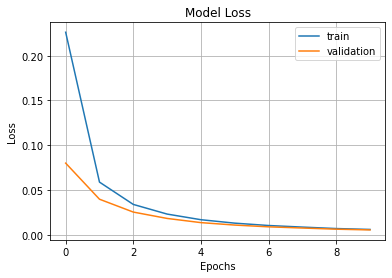

In [20]:
# Model Loss
plt.plot(ABTFruit.history['loss'])
plt.plot(ABTFruit.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## Predictions

### Import library

In [17]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from skimage.transform import resize

### Prediction values

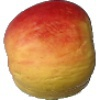

[[0.7882014  0.03191189 0.17988683]]


In [22]:
image = cv2.imread('/content/fruit-ds/test/apple/apple (10).jpg')
cv2_imshow(image)
resized = cv2.resize(image, (224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(resized)
img_array = tf.expand_dims(img_array, 0)
pred = abt_model.predict(img_array)
print(pred)

In [23]:
score = pred[0]
print(score)
print("แอปเปิล {:.2f} %".format(score[0]*100))
print("กล้วย {:.2f} %".format(score[1]*100))
print("มะเขือเทศ {:.2f} %".format(score[2]*100))

[0.7882014  0.03191189 0.17988683]
แอปเปิล 78.82 %
กล้วย 3.19 %
มะเขือเทศ 17.99 %


## prediction from test image

### Setting path of test images

In [24]:
test_data_path = '/content/fruit-ds/test'

### Prediction function

In [25]:
def abt_predict(image):
  """
  ฟังก์ชันสำหรับการทำนายภาพผลไม้ แอปเปื้ล กล้วย และมะเขือเทศ
  Prediction Function 
  args: image (<class 'numpy.ndarray'>)
  """
  resized = cv2.resize(image, (224, 224))
  img_array = tf.keras.preprocessing.image.img_to_array(resized)
  img_array = tf.expand_dims(img_array, 0)
  pred = abt_model.predict(img_array)
  score = pred[0]

  result = np.argmax(score)
  if result == 0:
    print('prediction: this is apple')
  if result == 1:
    print('prediction: this is banana')
  if result == 2:
    print("prediction: this is tomato")

  print("prediction score: Apple {:.2f} %".format(score[0]*100))
  print("prediction score: Banana {:.2f} %".format(score[1]*100))
  print("prediction score: Tomato {:.2f} %".format(score[2]*100))
  print("----------")
  return score

### view count of image and import library for random

In [26]:
print("All test image in 3 class apple, banana, tomato")
!ls /content/fruit-ds/test/*/* | wc -l 

print("\n------------------")

print("Apple image count")
!ls /content/fruit-ds/test/apple/* | wc -l 

print("\n------------------")

print("Banana Image Count")
!ls /content/fruit-ds/test/banana/* | wc -l 

print("\n------------------")

print("Tomato Image Count")
!ls /content/fruit-ds/test/tomato/* | wc -l 

All test image in 3 class apple, banana, tomato
2938

------------------
Apple image count
1100

------------------
Banana Image Count
484

------------------
Tomato Image Count
1354


### prediction use predict function by random image from test folder

In [30]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
# from skimage.transform import resize
from random import randint

In [28]:
test_data_path = '/content/fruit-ds/test'

#### Apple

In [32]:
# Apple
apple_pred = []
for i in range(30):
  im = cv2.imread(f'{test_data_path}/apple/apple ({randint(1,1000)}).jpg')
  print(f"apple figure({i+1})")
  cv2_imshow(cv2.resize(im, (30, 30)))
  apple_pred.append(abt_predict(im))


apple figure(1)


prediction: this is apple
prediction score: Apple 98.21 %
prediction score: Banana 0.60 %
prediction score: Tomato 1.19 %
----------
apple figure(2)


prediction: this is apple
prediction score: Apple 69.49 %
prediction score: Banana 0.31 %
prediction score: Tomato 30.20 %
----------
apple figure(3)


prediction: this is tomato
prediction score: Apple 19.53 %
prediction score: Banana 4.90 %
prediction score: Tomato 75.57 %
----------
apple figure(4)


prediction: this is tomato
prediction score: Apple 0.22 %
prediction score: Banana 0.30 %
prediction score: Tomato 99.48 %
----------
apple figure(5)


prediction: this is apple
prediction score: Apple 99.95 %
prediction score: Banana 0.01 %
prediction score: Tomato 0.04 %
----------
apple figure(6)


prediction: this is tomato
prediction score: Apple 5.43 %
prediction score: Banana 1.31 %
prediction score: Tomato 93.26 %
----------
apple figure(7)


prediction: this is tomato
prediction score: Apple 13.90 %
prediction score: Banana 0.06 %
prediction score: Tomato 86.05 %
----------
apple figure(8)


prediction: this is apple
prediction score: Apple 89.69 %
prediction score: Banana 0.19 %
prediction score: Tomato 10.12 %
----------
apple figure(9)


prediction: this is apple
prediction score: Apple 97.11 %
prediction score: Banana 0.22 %
prediction score: Tomato 2.67 %
----------
apple figure(10)


prediction: this is apple
prediction score: Apple 97.95 %
prediction score: Banana 0.53 %
prediction score: Tomato 1.52 %
----------
apple figure(11)


prediction: this is apple
prediction score: Apple 86.49 %
prediction score: Banana 2.93 %
prediction score: Tomato 10.58 %
----------
apple figure(12)


prediction: this is apple
prediction score: Apple 85.41 %
prediction score: Banana 2.08 %
prediction score: Tomato 12.50 %
----------
apple figure(13)


prediction: this is apple
prediction score: Apple 96.00 %
prediction score: Banana 0.09 %
prediction score: Tomato 3.91 %
----------
apple figure(14)


prediction: this is apple
prediction score: Apple 98.61 %
prediction score: Banana 0.87 %
prediction score: Tomato 0.52 %
----------
apple figure(15)


prediction: this is apple
prediction score: Apple 73.82 %
prediction score: Banana 1.96 %
prediction score: Tomato 24.22 %
----------
apple figure(16)


prediction: this is apple
prediction score: Apple 95.81 %
prediction score: Banana 0.76 %
prediction score: Tomato 3.43 %
----------
apple figure(17)


prediction: this is apple
prediction score: Apple 82.15 %
prediction score: Banana 0.28 %
prediction score: Tomato 17.57 %
----------
apple figure(18)


prediction: this is apple
prediction score: Apple 92.28 %
prediction score: Banana 0.20 %
prediction score: Tomato 7.51 %
----------
apple figure(19)


prediction: this is apple
prediction score: Apple 99.72 %
prediction score: Banana 0.09 %
prediction score: Tomato 0.20 %
----------
apple figure(20)


prediction: this is tomato
prediction score: Apple 0.05 %
prediction score: Banana 0.42 %
prediction score: Tomato 99.52 %
----------
apple figure(21)


prediction: this is apple
prediction score: Apple 99.56 %
prediction score: Banana 0.28 %
prediction score: Tomato 0.16 %
----------
apple figure(22)


prediction: this is apple
prediction score: Apple 91.09 %
prediction score: Banana 0.25 %
prediction score: Tomato 8.66 %
----------
apple figure(23)


prediction: this is apple
prediction score: Apple 76.78 %
prediction score: Banana 0.06 %
prediction score: Tomato 23.16 %
----------
apple figure(24)


prediction: this is tomato
prediction score: Apple 0.21 %
prediction score: Banana 1.49 %
prediction score: Tomato 98.30 %
----------
apple figure(25)


prediction: this is apple
prediction score: Apple 91.98 %
prediction score: Banana 0.15 %
prediction score: Tomato 7.87 %
----------
apple figure(26)


prediction: this is apple
prediction score: Apple 96.36 %
prediction score: Banana 0.07 %
prediction score: Tomato 3.58 %
----------
apple figure(27)


prediction: this is apple
prediction score: Apple 47.23 %
prediction score: Banana 12.19 %
prediction score: Tomato 40.59 %
----------
apple figure(28)


prediction: this is apple
prediction score: Apple 98.53 %
prediction score: Banana 0.66 %
prediction score: Tomato 0.81 %
----------
apple figure(29)


prediction: this is apple
prediction score: Apple 67.41 %
prediction score: Banana 0.67 %
prediction score: Tomato 31.93 %
----------
apple figure(30)


prediction: this is tomato
prediction score: Apple 43.26 %
prediction score: Banana 0.42 %
prediction score: Tomato 56.32 %
----------


In [33]:
apple_pred

[array([0.982114  , 0.00595679, 0.01192927], dtype=float32),
 array([0.69486976, 0.00314449, 0.3019857 ], dtype=float32),
 array([0.19528782, 0.04897811, 0.7557341 ], dtype=float32),
 array([0.0022389 , 0.00295591, 0.99480516], dtype=float32),
 array([9.9947530e-01, 7.8438628e-05, 4.4636696e-04], dtype=float32),
 array([0.05428963, 0.01309303, 0.93261737], dtype=float32),
 array([1.3898624e-01, 5.6309334e-04, 8.6045069e-01], dtype=float32),
 array([0.8968586 , 0.0018924 , 0.10124904], dtype=float32),
 array([0.97112817, 0.00219837, 0.02667341], dtype=float32),
 array([0.9795105 , 0.00533012, 0.01515933], dtype=float32),
 array([0.8648888 , 0.02933989, 0.10577135], dtype=float32),
 array([0.85414296, 0.02083581, 0.12502122], dtype=float32),
 array([9.6000093e-01, 8.7694998e-04, 3.9122079e-02], dtype=float32),
 array([0.9860563 , 0.00869504, 0.00524856], dtype=float32),
 array([0.7381835 , 0.01957492, 0.2422416 ], dtype=float32),
 array([0.958077  , 0.00757626, 0.03434677], dtype=float32

In [34]:
def acc_average(abt_pred, label):
  all_abt_score = []
  for a in range(30):
    abt_score = abt_pred[a][label]  # 0.96574855, 0.09570242, 0.9885767 ... 0.9686046
    abt_score = abt_score * 100  # 96.57485485076904, 9.57024171948433 ... 96.86046242713928
    abt_score = abt_score.astype(float)
    abt_score = ("{:.2f}".format(abt_score)) # 96.57, 9.836 ... 96.86
    abt_score = float(abt_score) #  str to float
    all_abt_score.append(abt_score) # append to list

  pred_average = sum(all_abt_score) / len(all_abt_score)

  return pred_average

In [35]:
acc_average_apple = acc_average(apple_pred, 0)
print("Apple average accuracy {:.2f} %".format(acc_average_apple))

Apple average accuracy 70.47 %


#### Banana

In [36]:
# Banana
banana_pred = []
for i in range(30):
  im = cv2.imread(f'{test_data_path}/banana/banana ({randint(1,480)}).jpg')
  print(f"banana figure({i+1})")
  cv2_imshow(cv2.resize(im, (30, 30)))
  banana_pred.append(abt_predict(im))

banana figure(1)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(2)


prediction: this is banana
prediction score: Apple 0.10 %
prediction score: Banana 99.50 %
prediction score: Tomato 0.40 %
----------
banana figure(3)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(4)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(5)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.97 %
prediction score: Tomato 0.03 %
----------
banana figure(6)


prediction: this is banana
prediction score: Apple 0.06 %
prediction score: Banana 99.65 %
prediction score: Tomato 0.29 %
----------
banana figure(7)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(8)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(9)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(10)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(11)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(12)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.30 %
prediction score: Tomato 0.70 %
----------
banana figure(13)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(14)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.99 %
prediction score: Tomato 0.01 %
----------
banana figure(15)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(16)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(17)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.99 %
prediction score: Tomato 0.00 %
----------
banana figure(18)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.36 %
prediction score: Tomato 0.64 %
----------
banana figure(19)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(20)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.33 %
prediction score: Tomato 0.67 %
----------
banana figure(21)


prediction: this is banana
prediction score: Apple 0.01 %
prediction score: Banana 99.55 %
prediction score: Tomato 0.43 %
----------
banana figure(22)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.99 %
prediction score: Tomato 0.01 %
----------
banana figure(23)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(24)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(25)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(26)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(27)


prediction: this is banana
prediction score: Apple 0.02 %
prediction score: Banana 98.16 %
prediction score: Tomato 1.82 %
----------
banana figure(28)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.99 %
prediction score: Tomato 0.01 %
----------
banana figure(29)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(30)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------


In [37]:
acc_average_banana = acc_average(banana_pred, 1)
print("Banana average accuracy {:.2f} %".format(acc_average_banana))

Banana average accuracy 99.83 %


#### Tomato

In [38]:
# Tomato
"""
tomato (1000).jpg - tomato (2000).jpg

"""
tomato_pred = []
for i in range(30):
  im = cv2.imread(f'{test_data_path}/tomato/tomato ({randint(1,1000)}).jpg')
  print(f"tomato figure({i+1})")
  cv2_imshow(cv2.resize(im, (30, 30)))
  tomato_pred.append(abt_predict(im))

tomato figure(1)


prediction: this is tomato
prediction score: Apple 0.00 %
prediction score: Banana 0.12 %
prediction score: Tomato 99.88 %
----------
tomato figure(2)


prediction: this is tomato
prediction score: Apple 0.50 %
prediction score: Banana 8.53 %
prediction score: Tomato 90.96 %
----------
tomato figure(3)


prediction: this is banana
prediction score: Apple 3.28 %
prediction score: Banana 94.67 %
prediction score: Tomato 2.06 %
----------
tomato figure(4)


prediction: this is tomato
prediction score: Apple 1.58 %
prediction score: Banana 6.77 %
prediction score: Tomato 91.65 %
----------
tomato figure(5)


prediction: this is tomato
prediction score: Apple 0.01 %
prediction score: Banana 35.80 %
prediction score: Tomato 64.19 %
----------
tomato figure(6)


prediction: this is tomato
prediction score: Apple 0.03 %
prediction score: Banana 1.30 %
prediction score: Tomato 98.67 %
----------
tomato figure(7)


prediction: this is tomato
prediction score: Apple 1.07 %
prediction score: Banana 5.03 %
prediction score: Tomato 93.90 %
----------
tomato figure(8)


prediction: this is tomato
prediction score: Apple 0.13 %
prediction score: Banana 6.03 %
prediction score: Tomato 93.84 %
----------
tomato figure(9)


prediction: this is tomato
prediction score: Apple 13.69 %
prediction score: Banana 22.82 %
prediction score: Tomato 63.50 %
----------
tomato figure(10)


prediction: this is tomato
prediction score: Apple 0.05 %
prediction score: Banana 0.23 %
prediction score: Tomato 99.73 %
----------
tomato figure(11)


prediction: this is tomato
prediction score: Apple 0.00 %
prediction score: Banana 0.21 %
prediction score: Tomato 99.79 %
----------
tomato figure(12)


prediction: this is tomato
prediction score: Apple 0.00 %
prediction score: Banana 0.47 %
prediction score: Tomato 99.53 %
----------
tomato figure(13)


prediction: this is tomato
prediction score: Apple 3.05 %
prediction score: Banana 20.25 %
prediction score: Tomato 76.71 %
----------
tomato figure(14)


prediction: this is tomato
prediction score: Apple 0.28 %
prediction score: Banana 0.04 %
prediction score: Tomato 99.68 %
----------
tomato figure(15)


prediction: this is apple
prediction score: Apple 60.90 %
prediction score: Banana 35.62 %
prediction score: Tomato 3.48 %
----------
tomato figure(16)


prediction: this is banana
prediction score: Apple 1.40 %
prediction score: Banana 70.61 %
prediction score: Tomato 27.98 %
----------
tomato figure(17)


prediction: this is tomato
prediction score: Apple 0.00 %
prediction score: Banana 0.09 %
prediction score: Tomato 99.91 %
----------
tomato figure(18)


prediction: this is tomato
prediction score: Apple 0.10 %
prediction score: Banana 0.13 %
prediction score: Tomato 99.78 %
----------
tomato figure(19)


prediction: this is tomato
prediction score: Apple 13.86 %
prediction score: Banana 1.06 %
prediction score: Tomato 85.08 %
----------
tomato figure(20)


prediction: this is tomato
prediction score: Apple 0.54 %
prediction score: Banana 6.82 %
prediction score: Tomato 92.64 %
----------
tomato figure(21)


prediction: this is tomato
prediction score: Apple 0.46 %
prediction score: Banana 6.88 %
prediction score: Tomato 92.66 %
----------
tomato figure(22)


prediction: this is tomato
prediction score: Apple 0.00 %
prediction score: Banana 0.03 %
prediction score: Tomato 99.97 %
----------
tomato figure(23)


prediction: this is banana
prediction score: Apple 0.31 %
prediction score: Banana 97.92 %
prediction score: Tomato 1.78 %
----------
tomato figure(24)


prediction: this is tomato
prediction score: Apple 11.83 %
prediction score: Banana 27.38 %
prediction score: Tomato 60.79 %
----------
tomato figure(25)


prediction: this is tomato
prediction score: Apple 0.20 %
prediction score: Banana 2.86 %
prediction score: Tomato 96.93 %
----------
tomato figure(26)


prediction: this is tomato
prediction score: Apple 6.21 %
prediction score: Banana 10.11 %
prediction score: Tomato 83.68 %
----------
tomato figure(27)


prediction: this is tomato
prediction score: Apple 0.37 %
prediction score: Banana 0.46 %
prediction score: Tomato 99.17 %
----------
tomato figure(28)


prediction: this is tomato
prediction score: Apple 0.29 %
prediction score: Banana 21.12 %
prediction score: Tomato 78.59 %
----------
tomato figure(29)


prediction: this is tomato
prediction score: Apple 2.93 %
prediction score: Banana 27.95 %
prediction score: Tomato 69.12 %
----------
tomato figure(30)


prediction: this is tomato
prediction score: Apple 0.16 %
prediction score: Banana 0.18 %
prediction score: Tomato 99.66 %
----------


In [39]:
acc_average_tomato = acc_average(tomato_pred, 2)
print("Tomato average accuracy {:.2f} %".format(acc_average_tomato))

Tomato average accuracy 78.84 %


## Save Model

In [40]:
model.save('apple_banana_tomato_model_03_11_2021', save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
